In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
filepath = r"E:\UF MSADS\SEM 1\Programming for DS\Mini project\Mini project 3"
df = pd.read_csv('cleaned_data.csv')
df

,Unnamed: 0,y,x2,x3,x4,x5,x6,x7,x8,x9,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,age
0,0,1,54359,0,50,5,5,5,4,3,...,3,4,3,21,1,1,1,192,2,3
1,1,1,84649,0,44,1,1,1,1,3,...,4,4,2,0,0,1,1,1034,0,3
2,2,0,59015,0,72,3,1,5,5,3,...,1,3,2,0,0,1,3,1452,0,4
3,3,0,99990,0,38,1,3,1,3,5,...,1,4,5,0,0,0,3,916,0,2
4,4,1,83569,1,37,5,5,5,5,2,...,4,4,5,0,0,1,1,390,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103081,104717,1,30483,1,27,5,5,5,5,5,...,3,5,5,70,0,1,1,1371,0,1
103082,104718,0,23530,0,62,1,4,4,4,4,...,3,1,3,6,0,1,2,1703,10,4
103083,104719,0,88477,1,45,3,4,3,5,1,...,3,4,1,16,0,0,3,562,2,3
103084,104720,0,17164,1,57,2,4,2,2,4,...,2,3,4,0,0,0,2,315,0,4


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,age
0,1,54359,0,50,5,5,5,4,3,5,...,3,4,3,21,1,1,1,192,2,3
1,1,84649,0,44,1,1,1,1,3,3,...,4,4,2,0,0,1,1,1034,0,3
2,0,59015,0,72,3,1,5,5,3,2,...,1,3,2,0,0,1,3,1452,0,4
3,0,99990,0,38,1,3,1,3,5,1,...,1,4,5,0,0,0,3,916,0,2
4,1,83569,1,37,5,5,5,5,2,5,...,4,4,5,0,0,1,1,390,0,2


In [ ]:
df.shape

**MODEL TRAIN-TEST**

In [4]:
# Get X and y
y = df['y']
x = df.drop(columns=['y'])
print(x.shape, y.shape)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50, shuffle=True)
print(X_train.shape, X_test.shape)

(103086, 24) (103086,)
(82468, 24) (20618, 24)


In [5]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=50)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

Accuracy: 0.962
Precision: 0.973
Recall: 0.937
F1 Score: 0.955


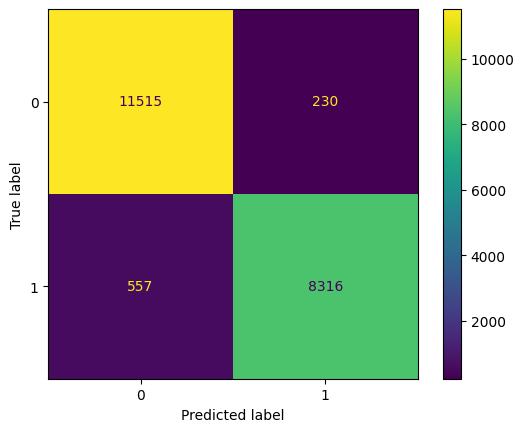

In [6]:
# Accuracy and Confusion Matrix for test data
accuracy = metrics.accuracy_score(y_test, rf_model.predict(X_test))
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, rf_model.predict(X_test))
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, rf_model.predict(X_test))
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, rf_model.predict(X_test))
print("F1 Score: %.3f" % f1)

cm = metrics.confusion_matrix(y_test, rf_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

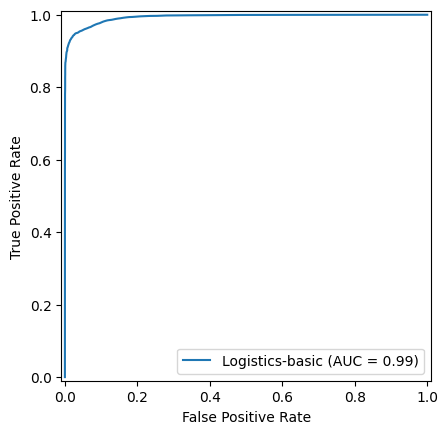

In [7]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,rf_model.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='Logistics-basic')
display.plot()

plt.show()

**HYPERPARAMETER TUNING**

In [8]:
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}

# Initialize RandomizedSearchCV
rf_grid = RandomizedSearchCV(estimator=RandomForestClassifier(),  # the model
                            param_distributions=param_grid_rf,  # hyperparameter space
                             scoring='roc_auc')  # default: 5 folder cross-validation

In [9]:
# Fit the model to the data
rf_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='roc_auc')

In [10]:
# Get the best parametetrs and the best estimator
print(rf_grid.best_params_)
best_rf = rf_grid.best_estimator_

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}


Accuracy: 0.964
Precision: 0.975
Recall: 0.939
F1 Score: 0.957


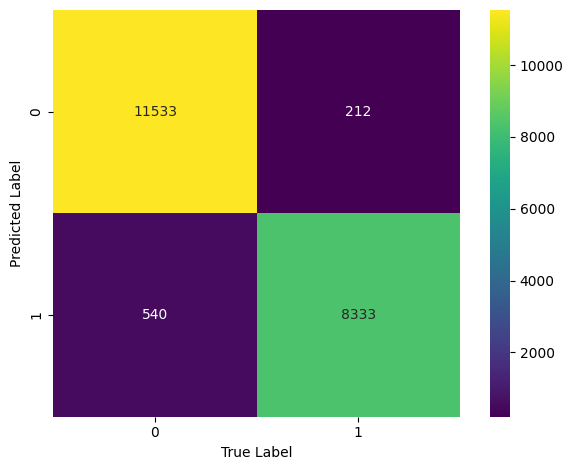

In [11]:
# Accuracy and Confusion Matrix for test data
accuracy = metrics.accuracy_score(y_test, best_rf.predict(X_test))
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, best_rf.predict(X_test))
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, best_rf.predict(X_test))
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, best_rf.predict(X_test))
print("F1 Score: %.3f" % f1)

cm = metrics.confusion_matrix(y_test, best_rf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', square=True, cbar=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

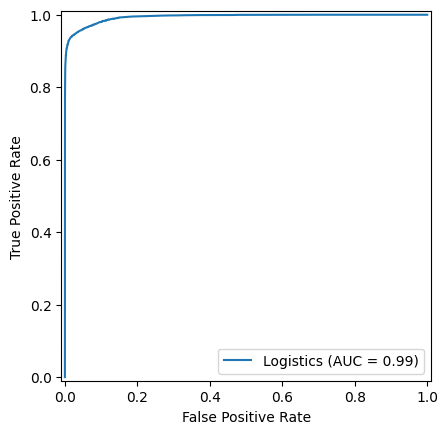

In [12]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,best_rf.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='Logistics')
display.plot()

plt.show()

**FEATURE IMPORTANCE**

In [14]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 5 features
print("Top 5 important features:")
importance_df.head()

Top 5 important features:


,Feature,Importance
8,x10,0.158164
3,x5,0.140127
20,x22,0.101935
19,x21,0.084697
10,x12,0.063603


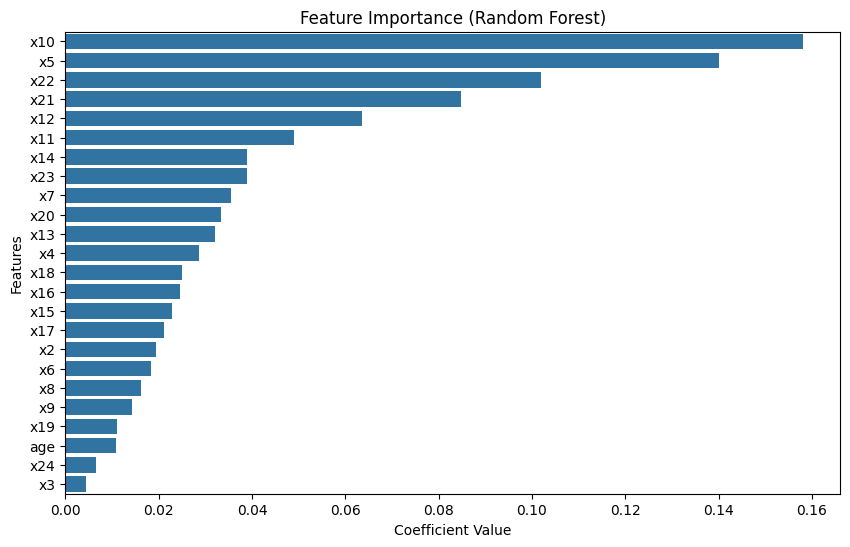

In [16]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()